# SVM Reliability Diagram

In [5]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

## Generate Two Class Dataset

In [15]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

## Split into Train/Test Sets

In [17]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=2)

## Fit a Model

In [18]:
model = SVC()
model.fit(trainX, trainy)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predict Probabilities

In [19]:
probs = model.decision_function(testX)

## Reliability Diagram

In [10]:
fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)

## Plot

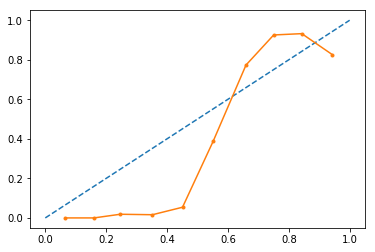

In [20]:
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()